6 visualizaciones qie ayudan a explicar o entender el target.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/ODD tp 1 dataset/train.parquet')

In [ ]:
df.describe()

,popularity,a_songs,a_popularity,did,s-label,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,31383.000000,31383.000000,31383.000000,7004.000000,7004.000000,31383.000000,31383.000000,3.138300e+04,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000,31383.000000
mean,53.394131,157.816716,8.535481,77926.453598,0.490309,0.204786,0.562056,2.356413e+05,0.680652,0.054620,0.191566,-7.049882,0.082286,121.824346,0.498826
std,12.608777,107.946587,21.634140,46585.206681,0.236605,0.268975,0.154644,6.795071e+04,0.216309,0.169244,0.150965,3.368481,0.087809,30.278152,0.235068
min,0.000000,1.000000,0.000000,167.000000,0.032100,0.000001,0.061700,3.141300e+04,0.007560,0.000000,0.009670,-33.350000,0.022200,34.717000,0.027200
25%,46.000000,87.000000,0.000000,38101.750000,0.301000,0.007815,0.457000,1.973730e+05,0.539000,0.000000,0.096000,-8.631500,0.034200,97.025000,0.313000
50%,54.000000,127.000000,1.500000,77514.000000,0.476000,0.070300,0.561000,2.269380e+05,0.716000,0.000019,0.130000,-6.220000,0.047500,119.974000,0.492000
75%,62.000000,199.000000,5.500000,120687.250000,0.674000,0.314000,0.671000,2.634735e+05,0.858000,0.003160,0.249000,-4.679000,0.086300,141.869000,0.681000
max,100.000000,759.000000,205.500000,158320.000000,0.984000,0.995000,0.986000,1.618693e+06,0.998000,0.994000,0.991000,0.605000,0.959000,220.041000,0.986000


**Chequeo valores nulos**

In [ ]:
df.genre.isnull().sum()

0

In [ ]:
df = df.drop(df[df.genre == "Children's Music"].index) 

In [ ]:
df.genre.value_counts()

Rock                3245
Alternative         3025
Dance               2961
Children’s Music    2845
Pop                 2686
Folk                1992
Rap                 1804
R&B                 1540
Blues               1503
Country             1425
Ska                 1360
Hip-Hop             1318
Indie               1241
Soul                1124
Electronic           896
Reggae               675
Jazz                 612
World                487
Reggaeton            358
Classical            147
Anime                 47
Comedy                37
Movie                 29
Soundtrack            16
Opera                  9
Name: genre, dtype: int64

**Creo df con generos más populares**

In [ ]:
top5_genre = df[df['genre'].isin(['Rock','Alternative', 'Dance', 'Children’s Music', 'Pop'])]

In [ ]:
top5_genre.head()

,track_name,lyric,genre,language,popularity,artist,a_genres,a_songs,a_popularity,did,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Remember those walls I built\nWell baby they'r...,Dance,en,79,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Halo,Remember those walls I built\nWell baby they'r...,Pop,en,80,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Partition,Driver roll up the partition please\nDriver ro...,Dance,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Partition,Driver roll up the partition please\nDriver ro...,Pop,en,71,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
6,Love On Top,"Bring the beat in!\n\nHoney, honey\nI can see ...",Dance,en,76,Beyoncé,Pop; R&B; Black Music,276.0,205.5,NaN,...,0.748,0.0000,C,0.6040,-5.242,Major,0.0887,94.100,4/4,0.652


In [ ]:
# Paso la duración de las canciones a segundos

top5_genre['duration_ms'] = top5_genre['duration_ms'].div(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
energy = top5_genre.groupby(['genre'])['energy'].mean()

In [ ]:
tempo = top5_genre.groupby(['genre'])['tempo'].mean()
tempo = tempo.to_frame().reset_index()
tempo = tempo.sort_values(by='tempo', ascending=True)

In [ ]:
valence = df.groupby(['genre'])['valence'].mean()
valence = valence.to_frame().reset_index()
valence = valence.sort_values(by='valence', ascending=True)

In [ ]:
danceability = df.groupby(['genre'])['danceability'].mean()
danceability = danceability.to_frame().reset_index()
danceability = danceability.sort_values(by='danceability', ascending=True)

In [ ]:
popularity = df.groupby(['genre'])['popularity'].mean()
popularity = popularity.to_frame().reset_index()
popularity = popularity.sort_values(by='popularity', ascending=True)

In [ ]:
key_mode = df.groupby(['genre','key']).size().reset_index()

In [ ]:
key_mode_sliced = key_mode[key_mode['genre'].isin(['Rock','Alternative', 'Dance', 'Children’s Music', 'Pop'])]

In [ ]:
df2 = key_mode_sliced.groupby(['genre','key']).agg({0: 'sum'})
Courses = key_mode_sliced.groupby(['genre']).agg({0: 'sum'})
df2 = (df2.div(Courses, level='genre') * 100).reset_index()

In [ ]:
key_mode_sliced.head()

,genre,key,0
0,Alternative,A,321
1,Alternative,A#,145
2,Alternative,B,266
3,Alternative,C,346
4,Alternative,C#,266


In [ ]:
canciones_cantidad = df.groupby('genre',as_index=False).count().sort_values(by='track_name',ascending=False)

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.bar(popularity, x='popularity', y='genre', color=popularity.popularity, color_continuous_scale='sunset')
fig.layout.title = 'Popularidad media de los géneros en base a las canciones que los componen'
fig.layout.xaxis.title= 'Popularidad'
fig.layout.yaxis.title= 'Géneros'
fig.layout.height = 800
fig.layout.width = 800
fig.update_coloraxes(showscale=False)
fig.show()

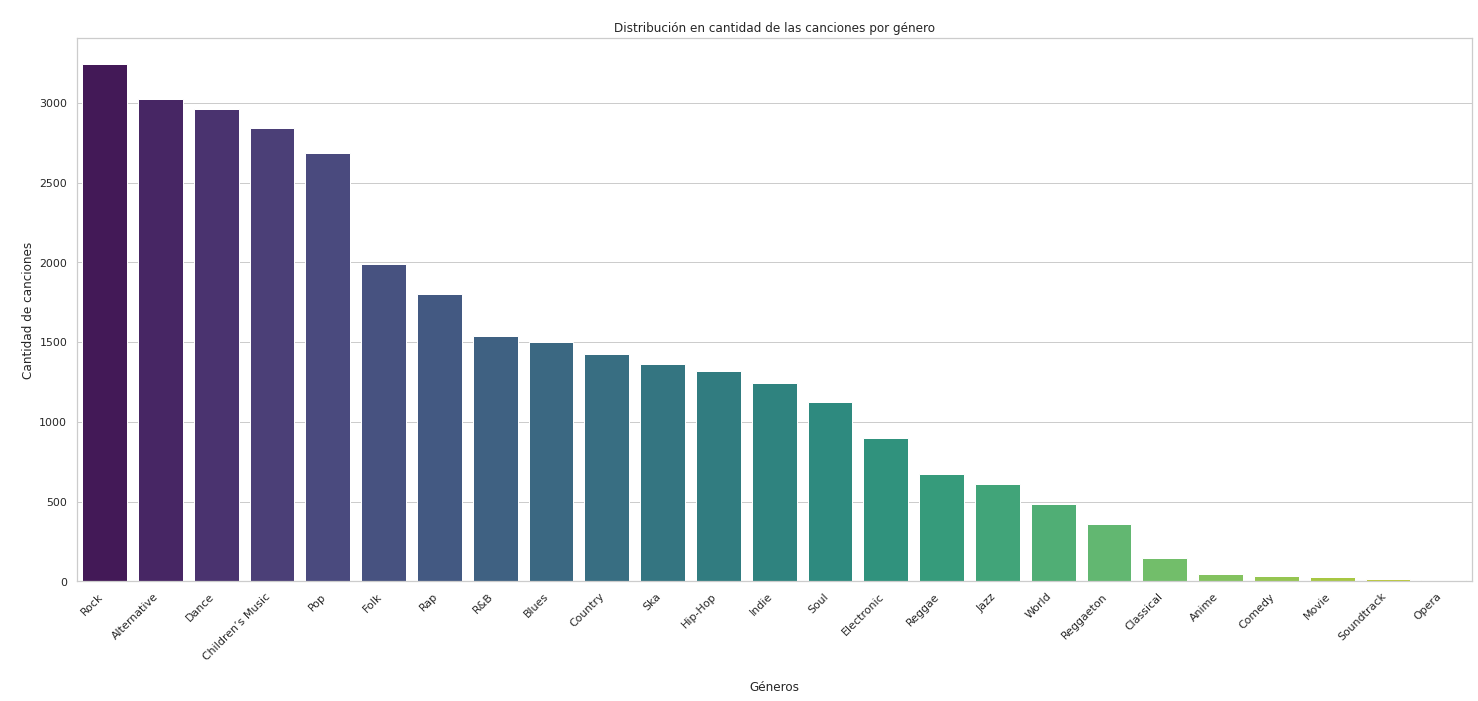

In [ ]:
plt.figure(figsize = (25,10));
sns.countplot(x="genre", data=df, palette="viridis", order = df['genre'].value_counts().index);
plt.ylabel('\nCantidad de canciones');
plt.xlabel('\nGéneros');
plt.title('\nDistribución en cantidad de las canciones por género');
plt.xticks(rotation=45, ha='right');

Text(0.5, 1.0, '\nDistribución de la duración de las canciones \n de los 5 géneros más populares de música\n')

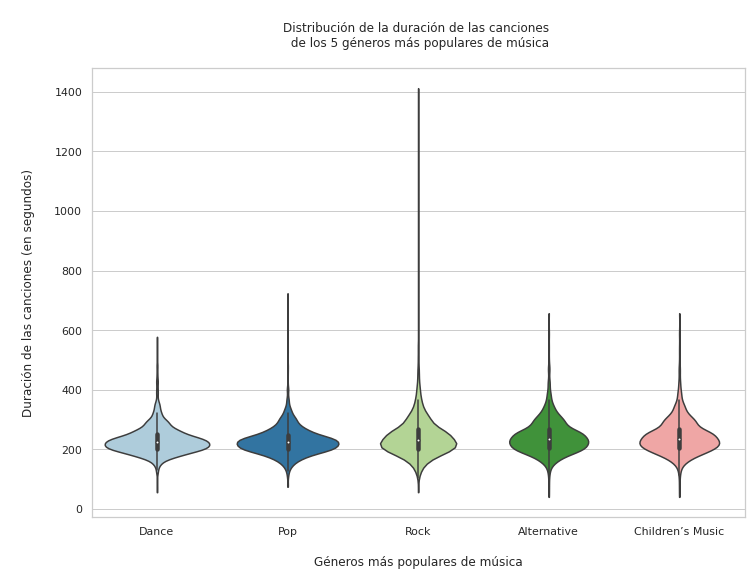

In [ ]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.violinplot(data=top5_genre, x="genre", y="duration_ms", cut=0, palette="Paired")
plt.xlabel("\nGéneros más populares de música")
plt.ylabel("\nDuración de las canciones (en segundos)\n")
plt.title("\nDistribución de la duración de las canciones \n de los 5 géneros más populares de música\n")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
plt.style.use("ggplot")

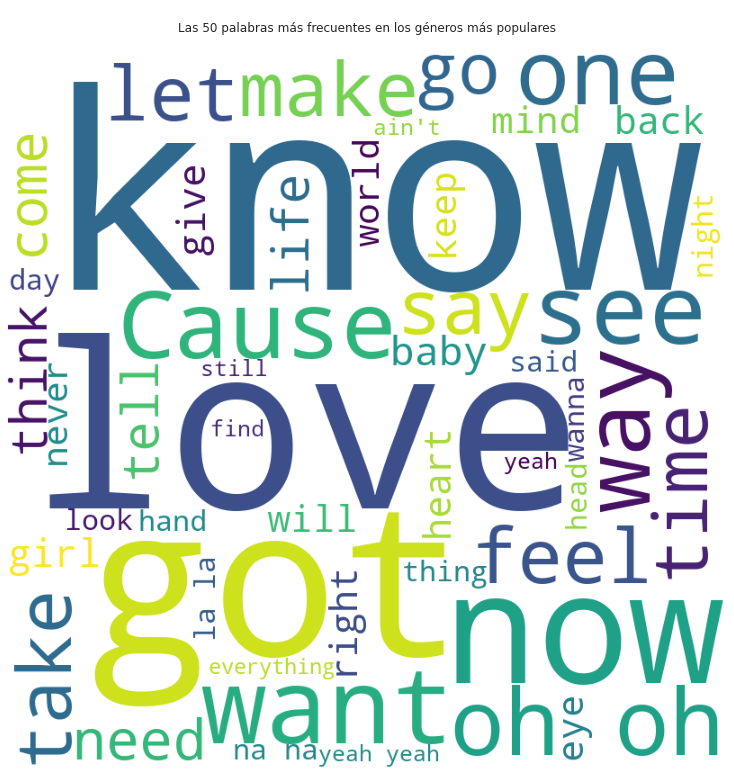

In [ ]:
max_words = 50
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', max_words = max_words, colormap="viridis",
                min_font_size = 10).generate(" ".join(top5_genre.lyric.astype(str)))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("\nLas 50 palabras más frecuentes en los géneros más populares\n")
plt.show()

In [ ]:
fig = px.bar(df2, x=0, y="genre", color="key",
            hover_data=['key'], barmode = 'stack')
fig.layout.title = 'Porcentaje de las notas de las canciones de los 5 géneros más populares'
fig.layout.xaxis.title= 'Porcentaje (%)'
fig.layout.yaxis.title= 'Géneros'
fig.show()